frame rate 30.0 
number of frames 3399.0 
selected frame index 10
difference 2.72
difference 2.72
difference 2.72
difference 2.72
difference 2.72
difference 2.72
difference 2.72
difference 2.72
difference 2.72
difference 2.72
difference 2.48
difference 2.48
difference 2.48
difference 2.48
difference 2.48
difference 2.48
difference 2.48
difference 2.48
difference 2.48
difference 2.48
difference 2.53
difference 2.53
difference 2.53
difference 2.53
difference 2.53
difference 2.53
difference 2.53
difference 2.53
difference 2.53
difference 2.53
difference 2.45
difference 2.45
difference 2.45
difference 2.45
difference 2.45
difference 2.45
difference 2.45
difference 2.45
difference 2.45
difference 2.45
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
difference 2.47
differ

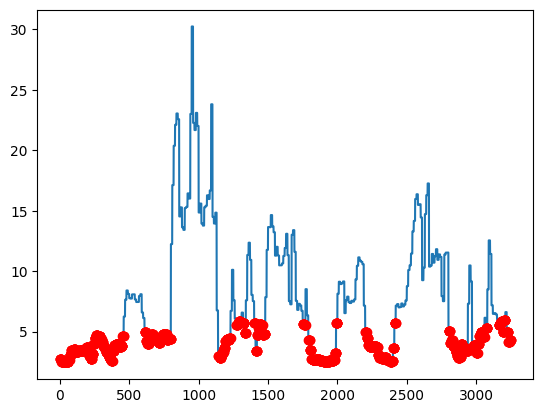

In [2]:
import cv2
import matplotlib.pyplot as plt

import util

file1 = "./vid/VID_20230929_200627.mp4"
file2 = "./vid/short-sample4.mp4"
file3 = "./vid/short-sample3.mp4"
file4 = "./vid/IMG_8020.mp4"

frames = cv2.VideoCapture(file2)

frame_rate = util.getFPS(frames)
number_of_frames = util.getNumberOfFrames(frames)
frame_rate_new = 3  # number of frames to select every second
selected_frame_index = int(frame_rate / frame_rate_new)  # pick every nth frame

print(
    "frame rate",
    frame_rate,
    "\nnumber of frames",
    number_of_frames,
    "\nselected frame index",
    selected_frame_index,
)

selected_frames = []  # list of selected frames by reduced framerate
difference_array = []  # array to store difference values
selected_values = []

image_compare_displacement = 15  # the distance between the compared images by index
difference_threshold = 6.0  # pick frames where the difference is less than this

counter = 0  # frame index
while counter < number_of_frames:
    _, frame = frames.read()
    frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
    # cv2.imshow('frame', frame)

    if counter % selected_frame_index == 0:  # append every nth frame
        selected_frames.append(frame)
        # print("added frame", counter)

    # cv2.imshow("selected frame", selected_frames[-1])

    if (len(selected_frames) > image_compare_displacement):  # if we have enough frames to compare
        im1 = selected_frames[len(selected_frames) - image_compare_displacement]
        im2 = selected_frames[-1]

        diff = cv2.mean(cv2.absdiff(im1, im2))[0]
        print("difference", format(diff, ".2f")) # format the difference to 2 decimal places
        difference_array.append(diff)

        if diff < difference_threshold:
            cv2.imshow("selected frame", selected_frames[-1])
            selected_values.append({"x": len(difference_array), "y": diff})

    counter += 1

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cv2.destroyAllWindows()

# plot the plot_diff and show it
plt.plot(difference_array)

# plot the selected values
plt.plot([x["x"] for x in selected_values], [x["y"] for x in selected_values], 'ro')
plt.show()
